In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.1)
datagen2 = ImageDataGenerator(rescale=1. / 255)
img_height = 299
img_width = 299 
batch_size = 32
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_DATASET',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_DATASET',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')
test_it = datagen2.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_TESTING_DATA',target_size=(img_height, img_width), batch_size = batch_size)

Found 9972 images belonging to 38 classes.
Found 1089 images belonging to 38 classes.
Found 1520 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.applications import xception
# Init the VGG model
vgg_conv = xception.Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[0:84]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcb7366ce50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcbbda90c10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fcb747bd850> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fcb735337d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcb7351e550> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fcb730d1a10> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fcb7306a1d0> False
<tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7fcb73072c90> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fcb730822d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fcb7308b690> False
<tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7fcb73086290> False
<tensorflow.pyt

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(768, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(38, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
#model.summary()

In [ ]:
import keras
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
nb_epochs = 35
#batch_size = 128
history = model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
311/311 [==============================] - 165s 512ms/step - loss: 3.6376 - acc: 0.0242 - val_loss: 3.6374 - val_acc: 0.0293
Epoch 2/35
311/311 [==============================] - 168s 541ms/step - loss: 3.6377 - acc: 0.0239 - val_loss: 3.6372 - val_acc: 0.0264
Epoch 3/35
311/311 [==============================] - 173s 555ms/step - loss: 3.6375 - acc: 0.0262 - val_loss: 3.6371 - val_acc: 0.0254
Epoch 4/35
311/311 [==============================] - 173s 555ms/step - loss: 3.6378 - acc: 0.0239 - val_loss: 3.6368 - val_acc: 0.0273
Epoch 5/35
311/311 [==============================] - 173s 555ms/step - loss: 3.6374 - acc: 0.0221 - val_loss: 3.6373 - val_acc: 0.0283
Epoch 6/35
311/311 [==============================] - 173s 555ms/step - loss: 3.6375 - acc: 0.0254 - val_loss: 3.6370 - val_acc: 0.0293
Epoch 7/35
311/311 [==============================] - 173s 555ms/step - loss: 3.6371 - acc: 0.0278 - val_loss: 3.6372 - val_acc: 0.0254
Epoch 8/35
311/311 [============================

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1/Dataset_Rafi_Xception")

In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

Text(0.5, 1.0, 'Loss Curves')

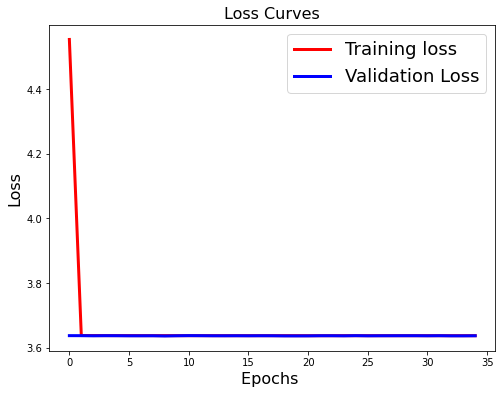

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

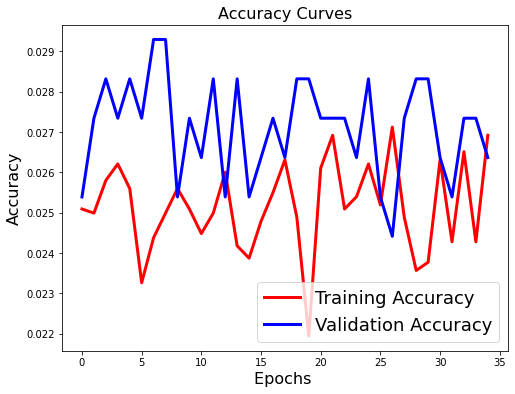

In [ ]:
# Accuracy Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['acc'],'r',linewidth=3.0)

plt.plot(history.history['val_acc'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.02      1.00      0.05         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         7
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         3
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_Rafi_Xception")

In [ ]:
batch_size = 1520
test_it = datagen2.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_TESTING_DATA',target_size=(img_height, img_width), batch_size = batch_size)

Found 1520 images belonging to 38 classes.


In [ ]:
y_img_batch, y_class_batch = test_it[0]


In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.02631578947368421


In [ ]:
y_class_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

NameError: ignored